# EDA

## **Load Library**

In [1]:
import os
import json
from datasets import load_from_disk
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from collections import Counter
from transformers import AutoTokenizer
from tqdm import tqdm

/opt/conda/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## **Wikipedia**

In [2]:
base_dir = '/data/ephemeral/home/data/'

In [3]:
path_wiki = os.path.join(base_dir, 'wikipedia_documents.json')

with open(path_wiki, "r") as f:
    data_wiki = json.load(f)

In [4]:
# Wikipedia document 총 데이터 개수
print("Wikipedia 데이터 개수 : {}".format(len(data_wiki)))

Wikipedia 데이터 개수 : 60613


In [5]:
# 데이터 딕셔너리 구성
print(type(data_wiki))

# 딕셔너리의 첫 번째 항목
first_item = next(iter(data_wiki.items()))
print(first_item)

<class 'dict'>
('0', {'text': '이 문서는 나라 목록이며, 전 세계 206개 나라의 각 현황과 주권 승인 정보를 개요 형태로 나열하고 있다.\n\n이 목록은 명료화를 위해 두 부분으로 나뉘어 있다.\n\n# 첫 번째 부분은 바티칸 시국과 팔레스타인을 포함하여 유엔 등 국제 기구에 가입되어 국제적인 승인을 널리 받았다고 여기는 195개 나라를 나열하고 있다.\n# 두 번째 부분은 일부 지역의 주권을 사실상 (데 팍토) 행사하고 있지만, 아직 국제적인 승인을 널리 받지 않았다고 여기는 11개 나라를 나열하고 있다.\n\n두 목록은 모두 가나다 순이다.\n\n일부 국가의 경우 국가로서의 자격에 논쟁의 여부가 있으며, 이 때문에 이러한 목록을 엮는 것은 매우 어렵고 논란이 생길 수 있는 과정이다. 이 목록을 구성하고 있는 국가를 선정하는 기준에 대한 정보는 "포함 기준" 단락을 통해 설명하였다. 나라에 대한 일반적인 정보는 "국가" 문서에서 설명하고 있다.', 'corpus_source': '위키피디아', 'url': 'TODO', 'domain': None, 'title': '나라 목록', 'author': None, 'html': None, 'document_id': 0})


In [6]:
# 내부 딕셔너리의 데이터 구성
data_wiki['0']

{'text': '이 문서는 나라 목록이며, 전 세계 206개 나라의 각 현황과 주권 승인 정보를 개요 형태로 나열하고 있다.\n\n이 목록은 명료화를 위해 두 부분으로 나뉘어 있다.\n\n# 첫 번째 부분은 바티칸 시국과 팔레스타인을 포함하여 유엔 등 국제 기구에 가입되어 국제적인 승인을 널리 받았다고 여기는 195개 나라를 나열하고 있다.\n# 두 번째 부분은 일부 지역의 주권을 사실상 (데 팍토) 행사하고 있지만, 아직 국제적인 승인을 널리 받지 않았다고 여기는 11개 나라를 나열하고 있다.\n\n두 목록은 모두 가나다 순이다.\n\n일부 국가의 경우 국가로서의 자격에 논쟁의 여부가 있으며, 이 때문에 이러한 목록을 엮는 것은 매우 어렵고 논란이 생길 수 있는 과정이다. 이 목록을 구성하고 있는 국가를 선정하는 기준에 대한 정보는 "포함 기준" 단락을 통해 설명하였다. 나라에 대한 일반적인 정보는 "국가" 문서에서 설명하고 있다.',
 'corpus_source': '위키피디아',
 'url': 'TODO',
 'domain': None,
 'title': '나라 목록',
 'author': None,
 'html': None,
 'document_id': 0}

In [7]:
# 'corpus_source'의 종류별 개수
corpus_sources = [item['corpus_source'] for item in data_wiki.values()]
source_counts = Counter(corpus_sources)

# 결과 출력
for source, count in source_counts.items():
    print(f"{source}: {count}개")

위키피디아: 60613개


In [8]:
# 'domain'의 종류별 개수
domains = [item['domain'] for item in data_wiki.values()]
domain_counts = Counter(domains)

# 결과 출력
for domain, count in domain_counts.items():
    print(f"{domain}: {count}개")

None: 60613개


In [9]:
# 'title'의 종류별 개수
titles = [item['title'] for item in data_wiki.values()]
title_counts = Counter(titles)
unique_titles = {item['title'] for item in data_wiki.values()}
unique_counts = len(unique_titles)

# 결과 출력
print("unique title의 개수 : ", unique_counts)
for title, count in title_counts.items():
    print(f"{title}: {count}개")

unique title의 개수 :  31755
나라 목록: 4개
백남준: 2개
아오조라 문고: 10개
데니스 리치: 2개
주기율표: 4개
아미노산: 4개
히라가나: 2개
파이의 날: 2개
푸리에 급수: 2개
통계학: 16개
자연철학의 수학적 원리: 2개
삼각함수: 2개
표준 모형: 6개
대수학: 6개
벡터곱: 2개
노벨 물리학상: 2개
각운동량: 2개
가타카나: 6개
정주영: 22개
마틴 가드너: 2개
아널드 슈워제네거: 4개
셀빅: 2개
콜라츠 추측: 2개
전자 게시판: 2개
채팅: 2개
PC통신: 10개
햄버거: 2개
선형대수학: 4개
프랙탈: 14개
실수: 2개
시삽: 2개
빌 클린턴: 18개
1월: 4개
4월: 2개
7월: 2개
8월: 2개
북한 (지역): 2개
헤르만 민코프스키: 2개
웹사이트: 4개
하이퍼텍스트: 4개
인터넷 프로토콜 스위트: 2개
안나 린드: 2개
기타: 10개
블랙데이: 2개
성당과 시장: 2개
자유민주당 (일본): 24개
한국야구위원회: 2개
인터프리터: 2개
가와바타 야스나리: 6개
보사노바: 2개
안토니우 카를루스 조빙: 2개
언어: 6개
마약: 10개
위키책: 2개
협업 소프트웨어: 6개
워드 커닝햄: 2개
리처드 스톨먼: 8개
자료: 2개
전기: 4개
RSS: 2개
돌묵상어: 2개
기술: 6개
영어: 18개
19세기: 2개
중국: 2개
엔트로피 부호화: 2개
패션: 2개
음정: 14개
점근 표기법: 2개
위지위그: 4개
프랜시스 크릭: 4개
페르디낭 드 소쉬르: 2개
피아노 소나타 14번 (베토벤): 8개
쿠바: 38개
마오둔: 2개
시 (문학): 4개
국제단위계: 4개
MacOS: 16개
쿼츠 (그래픽스 계층): 4개
헤이그: 2개
자유한국당: 44개
문서 편집기: 2개
나이로비: 2개
루트비히 판 베토벤: 66개
수도: 4개
게오르크 프리드리히 헨델: 6개
비드쿤 크비슬링: 4개
레프 톨스토이: 14개
인터내셔널가: 4개
고대 로마: 36개
진화생물학: 8개
드미트리 멘델레예프: 2개
스타니스와프 울람: 2개
에페소스

## **Datasets**

In [10]:
path_train = os.path.join(base_dir, 'train_dataset')
path_test = os.path.join(base_dir, 'test_dataset')

In [11]:
train_dic = load_from_disk(path_train)
test_dic = load_from_disk(path_test)

print(train_dic)
print(test_dic)

DatasetDict({
    train: Dataset({
        features: ['title', 'context', 'question', 'id', 'answers', 'document_id', '__index_level_0__'],
        num_rows: 3952
    })
    validation: Dataset({
        features: ['title', 'context', 'question', 'id', 'answers', 'document_id', '__index_level_0__'],
        num_rows: 240
    })
})
DatasetDict({
    validation: Dataset({
        features: ['question', 'id'],
        num_rows: 600
    })
})


In [12]:
train_df = pd.DataFrame.from_dict(train_dic['train'])
val_df = pd.DataFrame.from_dict(train_dic['validation'])
test_df = pd.DataFrame.from_dict(test_dic['validation'])

In [13]:
train_df.head(5)

,title,context,question,id,answers,document_id,__index_level_0__
0,미국 상원,미국 상의원 또는 미국 상원(United States Senate)은 양원제인 미국...,대통령을 포함한 미국의 행정부 견제권을 갖는 국가 기관은?,mrc-1-000067,"{'answer_start': [235], 'text': ['하원']}",18293,42
1,인사조직관리,'근대적 경영학' 또는 '고전적 경영학'에서 현대적 경영학으로 전환되는 시기는 19...,현대적 인사조직관리의 시발점이 된 책은?,mrc-0-004397,"{'answer_start': [212], 'text': ['《경영의 실제》']}",51638,2873
2,강희제,강희제는 강화된 황권으로 거의 황제 중심의 독단적으로 나라를 이끌어 갔기에 자칫 전...,강희제가 1717년에 쓴 글은 누구를 위해 쓰여졌는가?,mrc-1-000362,"{'answer_start': [510], 'text': ['백성']}",5028,230
3,금동삼존불감,"불상을 모시기 위해 나무나 돌, 쇠 등을 깎아 일반적인 건축물보다 작은 규모로 만든...",11~12세기에 제작된 본존불은 보통 어떤 나라의 특징이 전파되었나요?,mrc-0-001510,"{'answer_start': [625], 'text': ['중국']}",34146,992
4,계사명 사리구,동아대학교박물관에서 소장하고 있는 계사명 사리구는 총 4개의 용기로 구성된 조선후기...,명문이 적힌 유물을 구성하는 그릇의 총 개수는?,mrc-0-000823,"{'answer_start': [30], 'text': ['4개']}",47334,548


In [14]:
dict(train_df.iloc[0])

{'title': '미국 상원',
 'context': '미국 상의원 또는 미국 상원(United States Senate)은 양원제인 미국 의회의 상원이다.\\n\\n미국 부통령이 상원의장이 된다. 각 주당 2명의 상원의원이 선출되어 100명의 상원의원으로 구성되어 있다. 임기는 6년이며, 2년마다 50개주 중 1/3씩 상원의원을 새로 선출하여 연방에 보낸다.\\n\\n미국 상원은 미국 하원과는 다르게 미국 대통령을 수반으로 하는 미국 연방 행정부에 각종 동의를 하는 기관이다. 하원이 세금과 경제에 대한 권한, 대통령을 포함한 대다수의 공무원을 파면할 권한을 갖고 있는 국민을 대표하는 기관인 반면 상원은 미국의 주를 대표한다. 즉 캘리포니아주, 일리노이주 같이 주 정부와 주 의회를 대표하는 기관이다. 그로 인하여 군대의 파병, 관료의 임명에 대한 동의, 외국 조약에 대한 승인 등 신속을 요하는 권한은 모두 상원에게만 있다. 그리고 하원에 대한 견제 역할(하원의 법안을 거부할 권한 등)을 담당한다. 2년의 임기로 인하여 급진적일 수밖에 없는 하원은 지나치게 급진적인 법안을 만들기 쉽다. 대표적인 예로 건강보험 개혁 당시 하원이 미국 연방 행정부에게 퍼블릭 옵션(공공건강보험기관)의 조항이 있는 반면 상원의 경우 하원안이 지나치게 세금이 많이 든다는 이유로 퍼블릭 옵션 조항을 제외하고 비영리건강보험기관이나 보험회사가 담당하도록 한 것이다. 이 경우처럼 상원은 하원이나 내각책임제가 빠지기 쉬운 국가들의 국회처럼 걸핏하면 발생하는 의회의 비정상적인 사태를 방지하는 기관이다. 상원은 급박한 처리사항의 경우가 아니면 법안을 먼저 내는 경우가 드물고 하원이 만든 법안을 수정하여 다시 하원에 되돌려보낸다. 이러한 방식으로 단원제가 빠지기 쉬운 함정을 미리 방지하는 것이다.날짜=2017-02-05',
 'question': '대통령을 포함한 미국의 행정부 견제권을 갖는 국가 기관은?',
 'id': 'mrc-1-000067',
 'answers': {'answer_start'

In [15]:
val_df.head(5)

,title,context,question,id,answers,document_id,__index_level_0__
0,전효숙,"순천여자고등학교 졸업, 1973년 이화여자대학교를 졸업하고 1975년 제17회 사법...",처음으로 부실 경영인에 대한 보상 선고를 받은 회사는?,mrc-0-003264,"{'answer_start': [284], 'text': ['한보철강']}",9027,2146
1,스토우빌선,요크 카운티 동쪽에 처음으로 여객 열차 운행이 시작한 시점은 1868년 토론토 & ...,스카버러 남쪽과 코보콘그 마을의 철도 노선이 처음 연장된 연도는?,mrc-0-004762,"{'answer_start': [146], 'text': ['1871년']}",51765,3106
2,촐라,"촐라 정부\n 촐라의 정부 체제는 전제군주제였으며,2001 촐라의 군주는 절대적인 ...",촌락에서 운영 위원 후보자 이름을 쓰기위해 사용된 것은?,mrc-1-001810,"{'answer_start': [517], 'text': ['나뭇잎']}",15694,1180
3,백조 기사,프랑스의 십자군 무훈시는 1099년 예루살렘 왕국의 통치자가 된 고드프루아 드 부용...,로타이르가 백조를 구하기 위해 사용한 것은?,mrc-1-000219,"{'answer_start': [1109], 'text': ['금대야']}",59536,141
4,탈관료제화,탈관료제화는 현대사회에서 관료제 성격이 약화되는 현상이다. 현대사회에서 관료제는 약...,의견을 자유롭게 나누는 것은 조직 내 어떤 관계에서 가능한가?,mrc-1-000285,"{'answer_start': [386], 'text': ['수평적 관계']}",32991,184


In [16]:
test_df.head(5)

,question,id
0,유령'은 어느 행성에서 지구로 왔는가?,mrc-1-000653
1,용병회사의 경기가 좋아진 것은 무엇이 끝난 이후부터인가?,mrc-1-001113
2,돌푸스에게 불특정 기간동안 하원이 잠시 쉬는 것을 건의 받았던 인물은?,mrc-0-002191
3,"마오리언어와 영어, 뉴질랜드 수화를 공식 언어로 사용하는 나라는?",mrc-0-003951
4,디엔비엔푸 전투에서 보응우옌잡이 상대한 국가는?,mrc-1-001272


In [17]:
# 각 데이터셋의 총 데이터 개수
print("Train 데이터 개수 : {}".format(len(train_df)))
print("Validation 데이터 개수 : {}".format(len(val_df)))
print("Test 데이터 개수 : {}".format(len(test_df)))

Train 데이터 개수 : 3952
Validation 데이터 개수 : 240
Test 데이터 개수 : 600


### Missing value

In [18]:
train_missing = train_df.isnull().sum()
val_missing = val_df.isnull().sum()
test_missing = test_df.isnull().sum()

print("Train 데이터셋 결측치 : \n{}".format(train_missing))
print("Validation 데이터셋 결측치 : \n{}".format(val_missing))
print("Test 데이터셋 결측치 : \n{}".format(test_missing))

Train 데이터셋 결측치 : 
title                0
context              0
question             0
id                   0
answers              0
document_id          0
__index_level_0__    0
dtype: int64
Validation 데이터셋 결측치 : 
title                0
context              0
question             0
id                   0
answers              0
document_id          0
__index_level_0__    0
dtype: int64
Test 데이터셋 결측치 : 
question    0
id          0
dtype: int64


In [19]:
train_df['answer_start'] = train_df['answers'].apply(lambda x: x['answer_start'][0] if x['answer_start'] else None)
train_df['text'] = train_df['answers'].apply(lambda x: x['text'][0] if x['text'] else None)

val_df['answer_start'] = val_df['answers'].apply(lambda x: x['answer_start'][0] if x['answer_start'] else None)
val_df['text'] = val_df['answers'].apply(lambda x: x['text'][0] if x['text'] else None)

missing_counts_train = train_df[['answer_start', 'text']].isnull().sum()
missing_counts_val = val_df[['answer_start', 'text']].isnull().sum()
print(missing_counts_train)
print(missing_counts_val)

answer_start    0
text            0
dtype: int64
answer_start    0
text            0
dtype: int64


### Tokenization

#### Context, Question, Answer Token Lengths

```
kykim/bert-kor-base
```

In [42]:
# 인터넷에서 글어옴
def plot_token_length_hist(texts, feature_name='context', data_name='train', bins=15, color='blue'):
    tokenizer = AutoTokenizer.from_pretrained('kykim/bert-kor-base')
    token_lengths = []
    # 텍스트를 토큰화하여 토큰의 길이를 계산
    for text in tqdm(texts):
        token_length = len(tokenizer.tokenize(text))
        token_lengths.append(token_length)

    # 히스토그램으로 토큰의 길이 분포 시각화
    plt.figure(figsize=(13, 7))
    n, bins, patches = plt.hist(token_lengths, bins=bins, color=color, alpha=0.5)
    plt.xlabel('Token Length')
    plt.ylabel('Frequency')
    plt.title('[{}] {} Token Length'.format(data_name.title(), feature_name.title()))
    
    for i, (rate, count) in enumerate(zip(bins, n)):
        plt.text(rate + (bins[i+1] - bins[i]) / 2, count, str(int(count)), color='black', ha='center', va='bottom')
    
    plt.show()
    
    print("Max Token Length:", max(token_lengths))
    print("Average Token Length:", sum(token_lengths)/len(token_lengths))
    print("Min Token Length:", min(token_lengths))

100%|██████████| 3952/3952 [00:04<00:00, 876.77it/s]


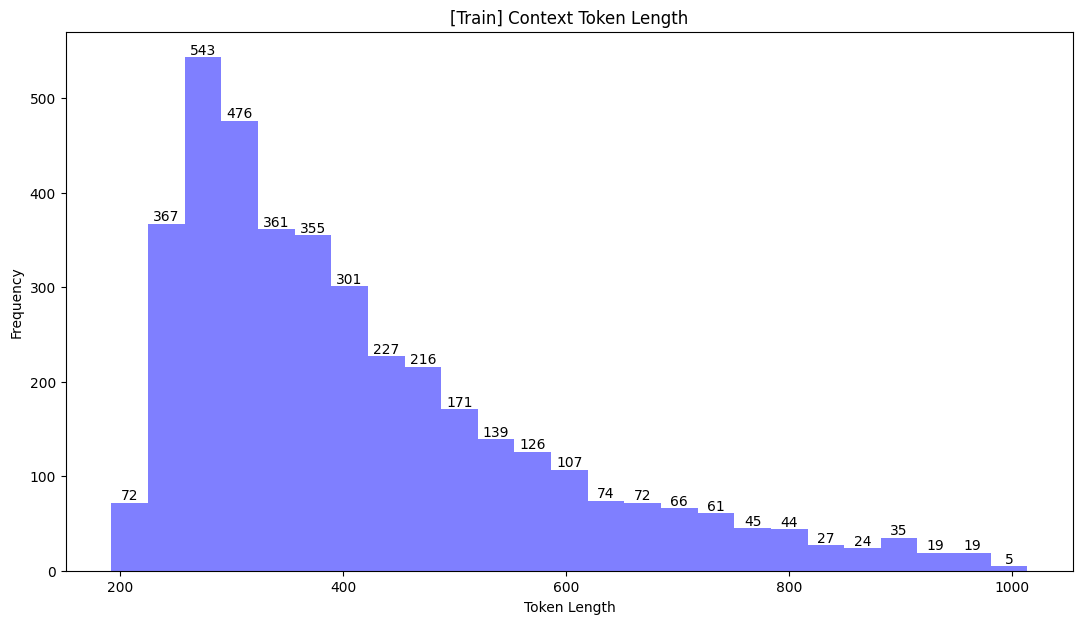

Max Token Length: 1014
Average Token Length: 416.28719635627533
Min Token Length: 192


In [43]:
# 분석할 텍스트
train_contexts = train_df.context
plot_token_length_hist(train_contexts, feature_name='context', data_name='train', bins=25, color='blue')

100%|██████████| 240/240 [00:00<00:00, 896.22it/s]


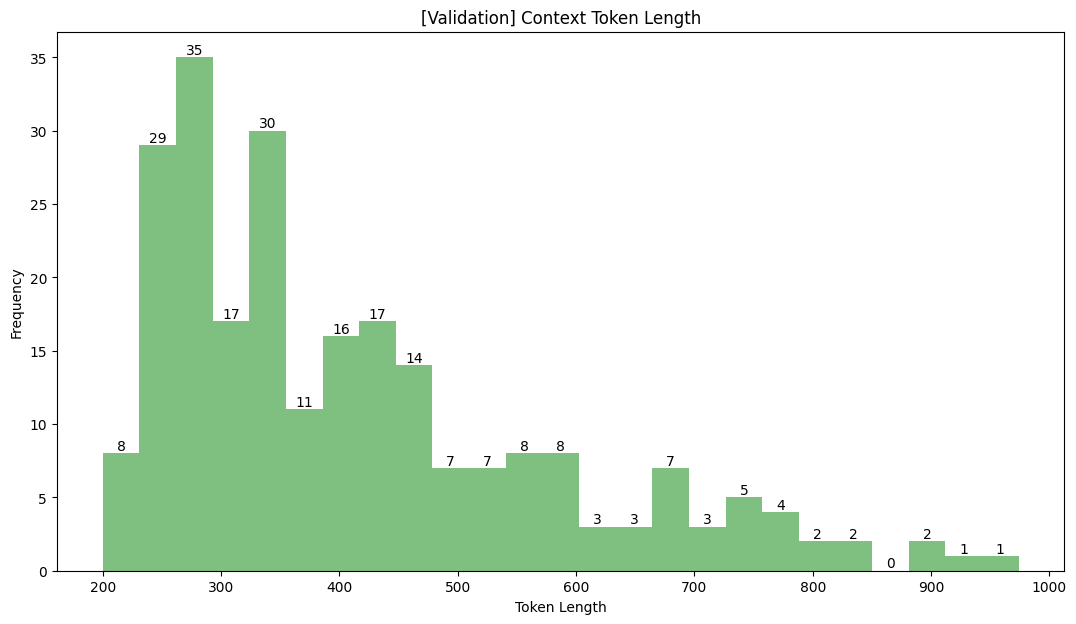

Max Token Length: 974
Average Token Length: 413.7
Min Token Length: 200


In [44]:
val_contexts = val_df.context
plot_token_length_hist(val_contexts, feature_name='context', data_name='validation', bins=25, color='green')

100%|██████████| 3952/3952 [00:00<00:00, 11995.52it/s]


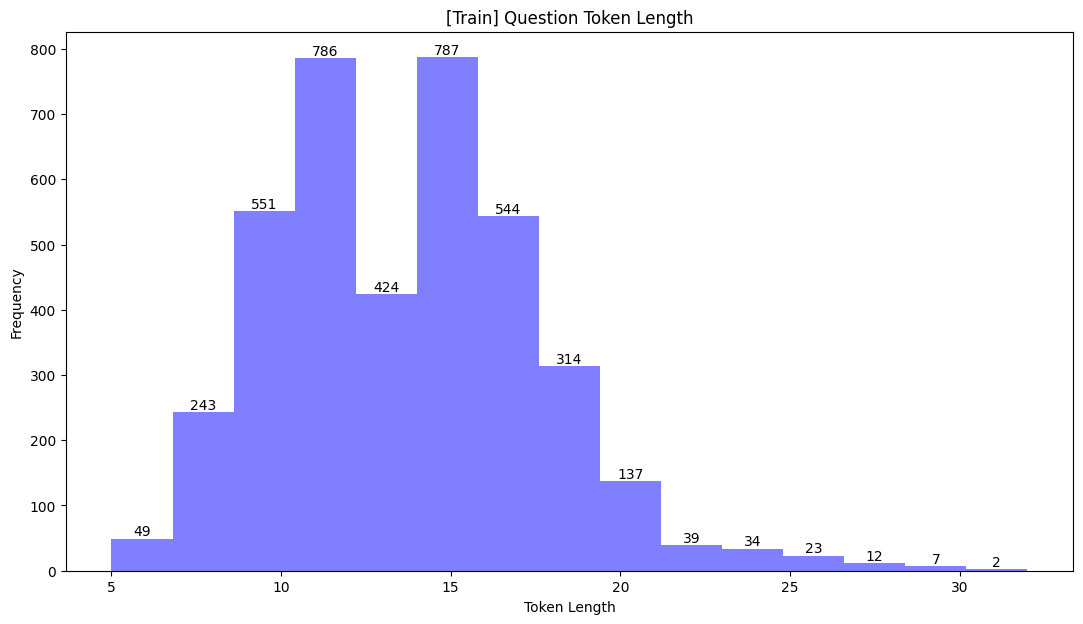

Max Token Length: 32
Average Token Length: 13.596406882591094
Min Token Length: 5


In [45]:
train_questions = train_df.question
plot_token_length_hist(train_questions, feature_name='question', data_name='train', bins=15, color='blue')

100%|██████████| 240/240 [00:00<00:00, 11950.29it/s]


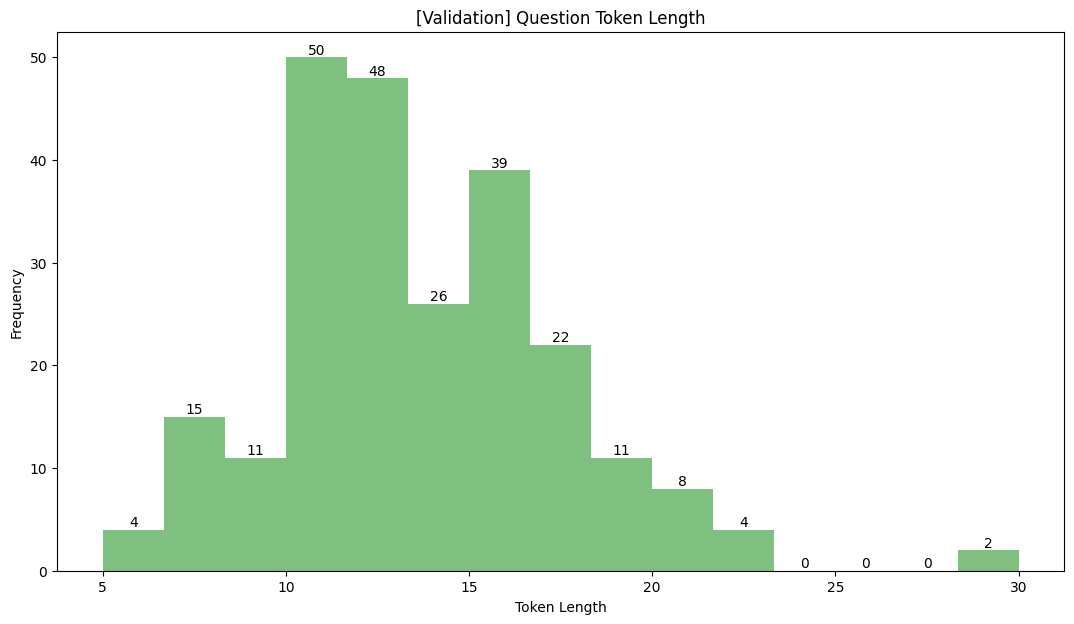

Max Token Length: 30
Average Token Length: 13.483333333333333
Min Token Length: 5


In [46]:
val_questions = val_df.question
plot_token_length_hist(val_questions, feature_name='question', data_name='validation', bins=15, color='green')

100%|██████████| 3952/3952 [00:00<00:00, 19805.47it/s]


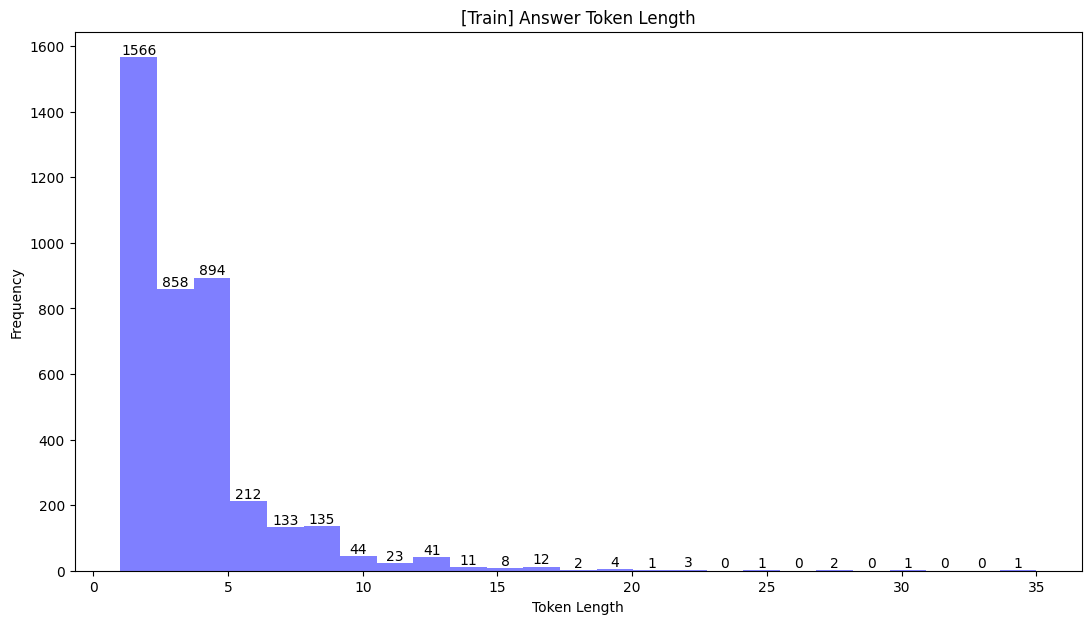

Max Token Length: 35
Average Token Length: 3.6462550607287447
Min Token Length: 1


In [48]:
train_answers = train_df.text
plot_token_length_hist(train_answers, feature_name='answer', data_name='train', bins=25, color='blue')

100%|██████████| 240/240 [00:00<00:00, 19297.09it/s]


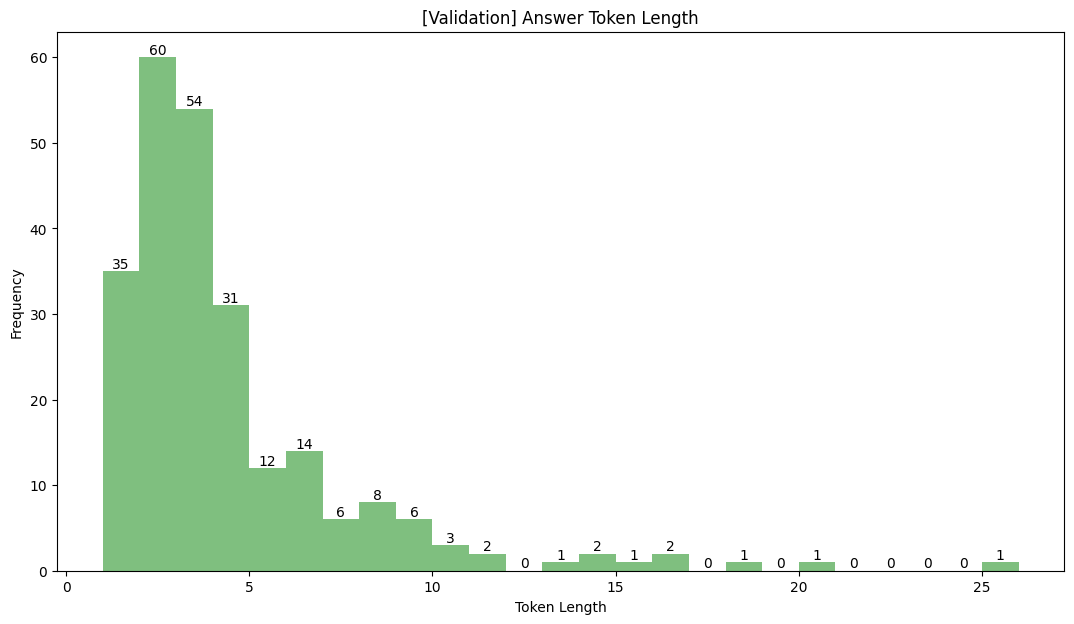

Max Token Length: 26
Average Token Length: 3.9541666666666666
Min Token Length: 1


In [49]:
val_answers = val_df.text
plot_token_length_hist(val_answers, feature_name='answer', data_name='validation', bins=25, color='green')

100%|██████████| 600/600 [00:00<00:00, 11799.87it/s]


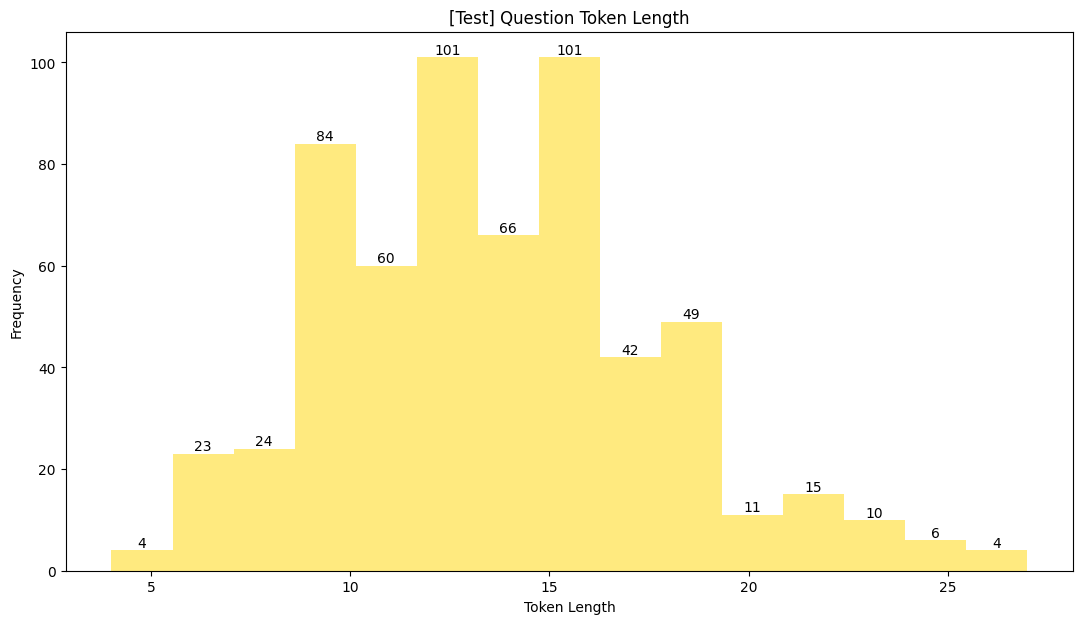

Max Token Length: 27
Average Token Length: 13.698333333333334
Min Token Length: 4


In [51]:
test_questions = test_df.question
plot_token_length_hist(test_questions, feature_name='question', data_name='test', bins=15, color='gold')

### Answer Rate

* Context 내에서 포함된 정답 단어 개수
* Context 내에서 포함된 정답 단어 비율

In [61]:
def answer_rate_plot(df, data_name='train', color='blue'):
    contexts = df.context
    answers_texts = df.text
    
    answer_inclusion_rate = []
    for context, answer_text in zip(tqdm(contexts), answers_texts):
        answer_inclusion_rate.append(context.count(answer_text))
    
    # 히스토그램으로 정답 위치 분포 시각화
    plt.figure(figsize=(13, 7))
    plt.hist(answer_inclusion_rate, bins=np.arange(min(answer_inclusion_rate), max(answer_inclusion_rate) + 2) - 0.5, color=color, alpha=.7)
    plt.xlabel('Answer Inclusion Rates')
    plt.ylabel('Frequency')
    plt.title('{} Answer Inclusion Rate '.format(data_name.title()))
    
    plt.xticks(np.arange(min(answer_inclusion_rate), max(answer_inclusion_rate) + 1))
    for i, v in zip(range(max(answer_inclusion_rate)+1), np.bincount(answer_inclusion_rate)):
        plt.text(i, v, str(v), color='black', ha='center', va='bottom')
    
    plt.show()
    
    print("Max Inclusion Rate: {:d}".format(max(answer_inclusion_rate)))
    print("Average Inclusion Rate: {:.4f}".format(sum(answer_inclusion_rate)/len(answer_inclusion_rate)))
    print("Min Inclusion Rate: {:d}".format(min(answer_inclusion_rate)))

100%|██████████| 3952/3952 [00:00<00:00, 386763.02it/s]


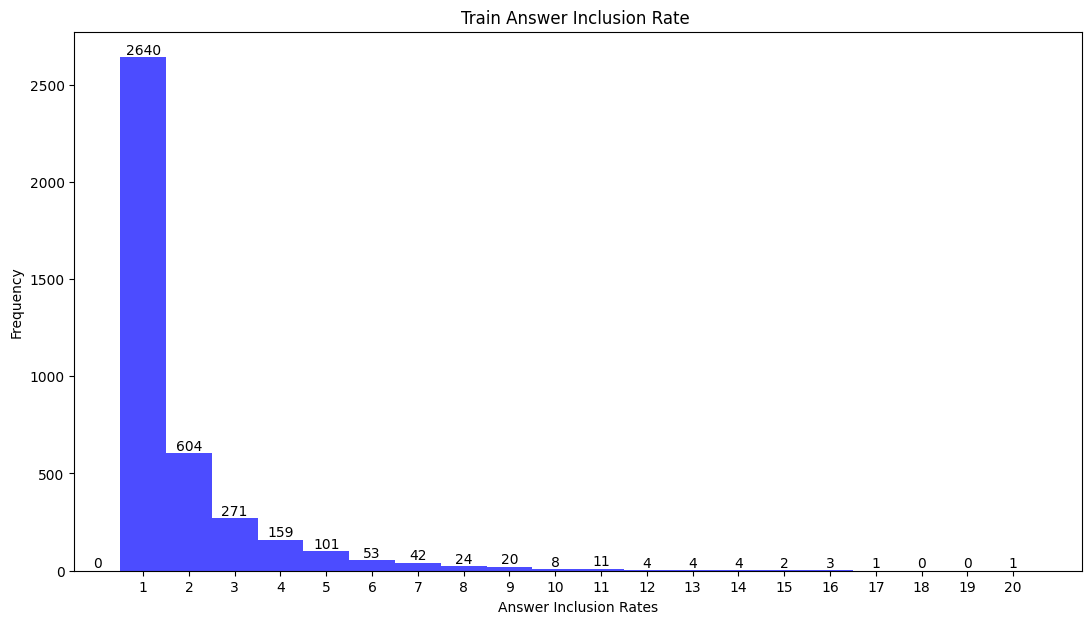

Max Inclusion Rate: 20
Average Inclusion Rate: 1.8365
Min Inclusion Rate: 1


In [62]:
answer_rate_plot(train_df, data_name='train')

100%|██████████| 240/240 [00:00<00:00, 337569.74it/s]


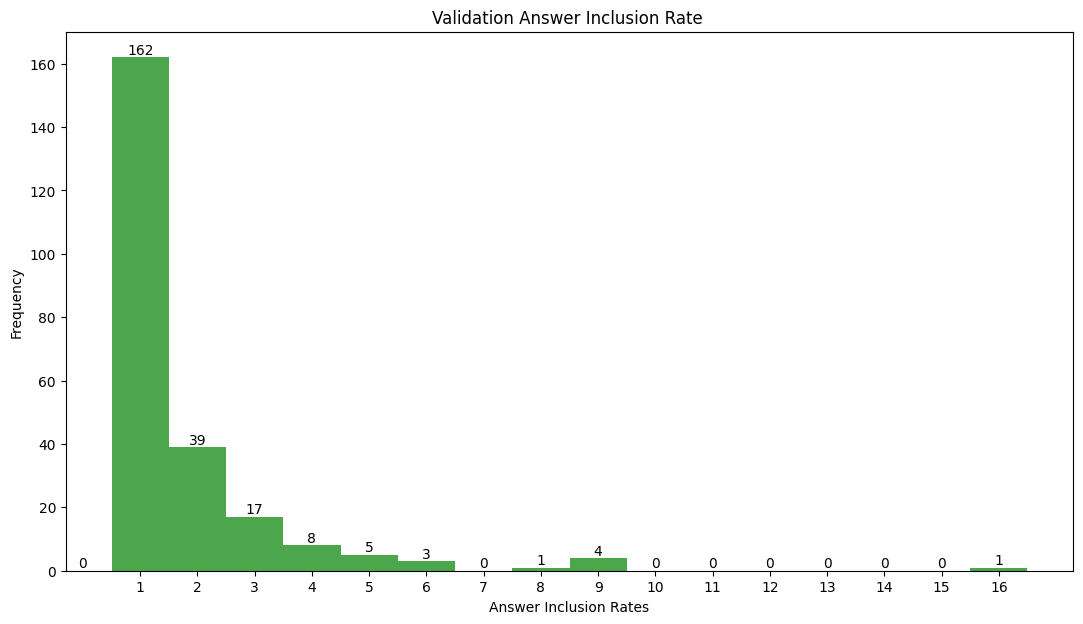

Max Inclusion Rate: 16
Average Inclusion Rate: 1.7750
Min Inclusion Rate: 1


In [63]:
answer_rate_plot(val_df, data_name='validation', color='green')